<a href="https://colab.research.google.com/github/eltondeoliveirasilva/Series_temporais/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


from statsmodels.tsa.arima.model import ARIMA

In [2]:
!pip install scipy

In [3]:
!pip install pmdarima

In [4]:
from pmdarima.arima import auto_arima

In [5]:
from xgboost import XGBRegressor

In [6]:
df = pd.read_excel('/content/drive/MyDrive/energy.xlsx', index_col='DATE', parse_dates=True)
df.head()

,energy
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
treino = df.loc[df.index <= '2016-12-31']
validacao = df.loc[df.index > '2016-12-31']

treino.shape, validacao.shape

((384, 1), (24, 1))

In [9]:
treino.index.min(), treino.index.max()

(Timestamp('1985-01-01 00:00:00'), Timestamp('2016-12-01 00:00:00'))

In [10]:
validacao.index.min(), validacao.index.max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2018-12-01 00:00:00'))

In [11]:
df.columns = ['producao']
df.head()

,producao
DATE,
1985-01-01,71.5920
1985-02-01,69.7870
1985-03-01,61.6790
1985-04-01,56.7479
1985-05-01,54.6165


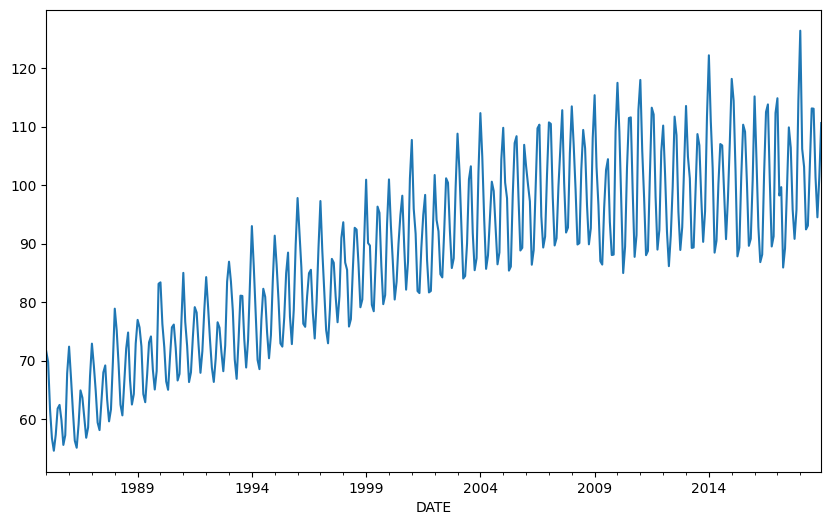

In [12]:
df["producao"].plot(figsize=(10, 6));

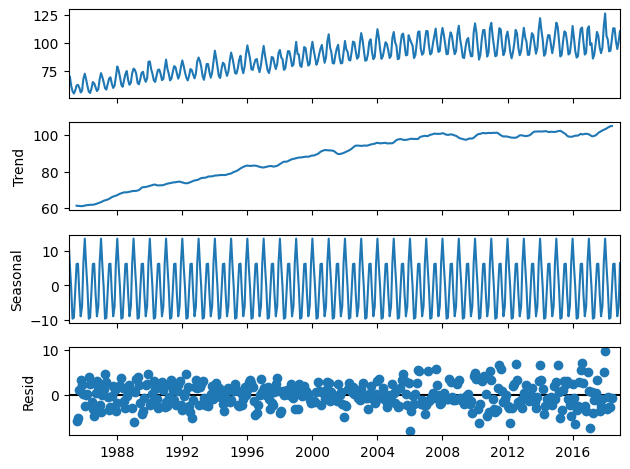

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(df)
resultado.plot();

In [14]:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(df['producao'].dropna())
print(f'Teste ADF:{resultado[0]}')
print(f'p-valor:{resultado[1]}')

Teste ADF:-2.252399047046594
p-valor:0.18777984601967806


In [15]:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(df['producao'].diff().dropna())
print(f'Teste ADF:{resultado[0]}')
print(f'p-valor:{resultado[1]}')

Teste ADF:-7.450892277526341
p-valor:5.67456995585561e-11


In [16]:
fit_arima = auto_arima(df, d1 = 1, start_p = 1, start_q = 1, max_p = 3,
                       max_q = 3, seasonal=True, m=6,d=1,start_P=1,start_Q=1,
                       max_P=2,max_Q=2,information_criterion='aic', trace=True,
                       error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[6] intercept   : AIC=inf, Time=7.51 sec
 ARIMA(0,1,0)(0,0,0)[6] intercept   : AIC=2828.908, Time=0.13 sec
 ARIMA(1,1,0)(1,0,0)[6] intercept   : AIC=2487.856, Time=1.55 sec
 ARIMA(0,1,1)(0,0,1)[6] intercept   : AIC=2657.241, Time=3.31 sec
 ARIMA(0,1,0)(0,0,0)[6]             : AIC=2826.969, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[6] intercept   : AIC=2774.795, Time=0.43 sec
 ARIMA(1,1,0)(2,0,0)[6] intercept   : AIC=inf, Time=3.05 sec
 ARIMA(1,1,0)(1,0,1)[6] intercept   : AIC=2179.704, Time=3.12 sec
 ARIMA(1,1,0)(0,0,1)[6] intercept   : AIC=2684.828, Time=0.48 sec
 ARIMA(1,1,0)(2,0,1)[6] intercept   : AIC=2082.006, Time=4.10 sec
 ARIMA(1,1,0)(2,0,2)[6] intercept   : AIC=1982.409, Time=16.00 sec
 ARIMA(1,1,0)(1,0,2)[6] intercept   : AIC=2128.008, Time=9.64 sec
 ARIMA(0,1,0)(2,0,2)[6] intercept   : AIC=1999.825, Time=12.13 sec
 ARIMA(2,1,0)(2,0,2)[6] intercept   : AIC=1955.372, Time=4.33 sec
 ARIMA(2,1,0)(1,0,2)[6] intercept   : AIC

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df, order=(1,1,1), seasonal_order=(2,0,2,6))
model_result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [18]:
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                               producao   No. Observations:                  408
Model:             SARIMAX(1, 1, 1)x(2, 0, [1, 2], 6)   Log Likelihood                -945.127
Date:                                Thu, 15 Aug 2024   AIC                           1904.254
Time:                                        17:58:59   BIC                           1932.316
Sample:                                    01-01-1985   HQIC                          1915.360
                                         - 12-01-2018                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5188      0.042     12.421      0.000       0.437       0.601
ma.L1         -0.9644      0.016    -62.069      0.000      -0.995      -0.934
ar.S.L6        0.0008      0.004      0.212      0.832      -0.006       0.008
ar.S.L12       0.9953      0.003    289.090      0.000       0.989       1.002
ma.S.L6        0.1072      0.039      2.735      0.006       0.030       0.184
ma.S.L12      -0.7703      0.037    -20.777      0.000      -0.843      -0.698
sigma2         5.6367      0.321     17.568      0.000       5.008       6.266
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                26.55
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
predicoes = model_result.get_prediction(start=-12)
predicoes_media = predicoes.predicted_mean

In [20]:
intervalo_confianca = predicoes.conf_int()
limite_inferior = intervalo_confianca.iloc[:, 0]
limite_superior = intervalo_confianca.iloc[:, 1]
limite_inferior[0], limite_superior[0]

<ipython-input-20-9405bc4a999e>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_inferior[0], limite_superior[0]


(115.07168803658523, 124.37830233867494)

In [21]:
predicoes_media[0]

<ipython-input-21-b93c4703cfc4>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  predicoes_media[0]


119.72499518763009

In [22]:
datas_previsao = np.asarray(predicoes_media.index[-12:])
datas = np.asarray(df.index)

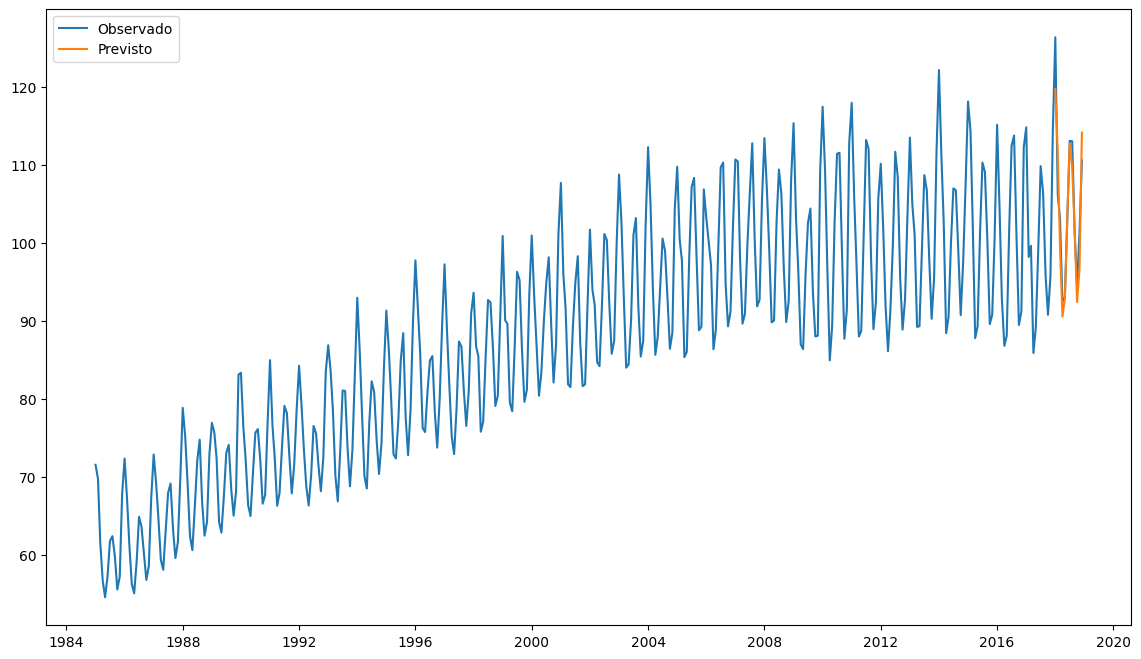

In [36]:
plt.figure(figsize=(14, 8))
plt.plot(datas, df['producao'], label='Observado')
plt.plot(datas_previsao, predicoes_media, label='Previsto')
plt.legend(loc='upper left')

In [24]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df[-12:].values, predicoes_media.values)
print(mae)

2.688955306504161


In [27]:
forecast = model_result.get_forecast(steps=12)
forecast_media = forecast.predicted_mean
forecast_media.size

12

In [28]:
intervalo_confianca = forecast.conf_int()
limite_inferior = intervalo_confianca.iloc[:, 0]
limite_superior = intervalo_confianca.iloc[:, 1]
limite_inferior[10], limite_superior[10]

<ipython-input-28-8d2c8aa5c182>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_inferior[10], limite_superior[10]


(91.43936378405044, 103.12380329114231)

In [30]:
datas_forcast = np.asarray(forecast_media.index)
pred_dates = np.asarray(predicoes_media.index)

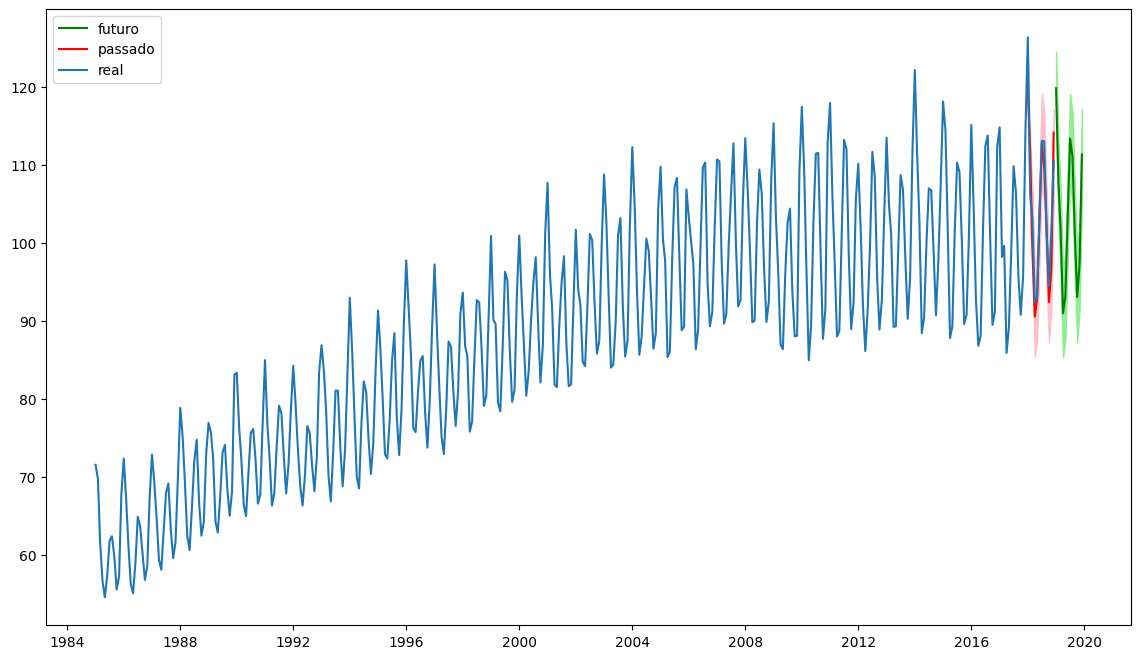

In [35]:
dates = np.asarray(df.index)
plt.figure(figsize=(14, 8))
plt.plot(datas_forcast, forecast_media.values, label='futuro',color='green')
plt.fill_between(datas_forcast, limite_inferior, limite_superior, color='lightgreen')

plt.plot(pred_dates, predicoes_media.values, label='passado',color='red')
plt.fill_between(pred_dates, limite_inferior, limite_superior, color='pink')

plt.plot(dates, df.values, label='real')
plt.legend(loc='upper left')
plt.show()